# T1

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sb

In [5]:
data = pd.read_csv("T1_features_final.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)

In [5]:
y.shape


(52,)

In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.6363636363636364


In [8]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9090909090909091


In [9]:
gb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)


Accuracy: 0.36363636363636365


In [10]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier = LogisticRegression(max_iter=1000)
# Train the classifier
logreg_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.9090909090909091


In [11]:
from keras.models import Sequential, load_model
from keras.layers import Dense

In [12]:
norm = Normalizer(norm='max')
norm.fit(X_train)
X_train = norm.transform(X_train)

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2

model1 = Sequential()
model1.add(Dense(512, activation='relu',kernel_regularizer=l1(0.01),input_dim=8))
model1.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 8.0385 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.81818, saving model to best_model.h5
2/2 [==============================] - 1s 295ms/step - loss: 7.9860 - accuracy: 0.5122 - val_loss: 7.4710 - val_accuracy: 0.8182
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 7.5650 - accuracy: 0.6875
Epoch 2: val_accuracy did not improve from 0.81818
2/2 [==============================] - 0s 44ms/step - loss: 7.5254 - accuracy: 0.5610 - val_loss: 7.3225 - val_accuracy: 0.5455
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 7.1410 - accuracy: 0.5625
Epoch 3: val_accuracy did not improve from 0.81818
2/2 [==============================] - 0s 49ms/step - loss: 7.1020 - accuracy: 0.5122 - val_loss: 8.5829 - val_accuracy: 0.4545
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 6.7530 - accuracy: 0.4375
Epoch 4: val_accuracy did not improve from 0.81818
2/2

In [9]:
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
from keras.optimizers import Adam, RMSprop, SGD, Adagrad
from keras.activations import relu, sigmoid, tanh

# Define a function to create your model (to be used by GridSearchCV)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_layers=1, neurons=256, kernel_regularizer=None, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=8, kernel_regularizer=kernel_regularizer))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer.")
        
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad'],
    'batch_size': [32, 64],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'hidden_layers': [1, 2, 3],
    'neurons': [256, 512, 1024],
    'kernel_regularizer': [None, l1(0.01), l2(0.01)],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Create a callback for ModelCheckpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Create the GridSearchCV object with the updated parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Split your data into training and validation sets (replace X_train and y_train with your actual data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the data to the GridSearchCV object, including the ModelCheckpoint callback
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

 

C:\Users\surface\AppData\Local\Temp\ipykernel_7924\623638157.py:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Parameters:  {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.0, 'hidden_layers': 2, 'kernel_regularizer': <keras.regularizers.L2 object at 0x000001A5F5EA4810>, 'learning_rate': 0.001, 'neurons': 512, 'optimizer': 'sgd'}
Best Accuracy:  0.7268518606821696


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2

model1 = Sequential()
model1.add(Dense(512, activation='relu',kernel_regularizer=l1(0.01),input_dim=8))
model1.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='relu'))
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'],learning_rate = 0.001)
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

In [ ]:

weights = model1.get_weights()
print(weights)

[array([[ 5.90816960e-02,  4.25543860e-02, -5.21179056e-03, ...,
         2.56069587e-03,  3.91284600e-02,  3.05821118e-03],
       [-3.39103863e-05,  3.35119069e-02, -5.96002385e-04, ...,
        -1.86326029e-03,  4.36576374e-04, -2.32449127e-03],
       [-2.52395496e-02, -1.18172415e-04, -9.32617486e-03, ...,
         2.78470805e-03, -2.30129372e-04, -5.58189407e-04],
       ...,
       [-4.57025766e-02,  6.48717284e-02, -6.72099516e-02, ...,
         2.85122041e-02,  2.21679686e-04,  2.16059666e-03],
       [ 1.22795412e-02,  9.70283290e-04, -1.15546468e-03, ...,
         2.88736168e-03, -4.98808473e-02,  6.15542009e-02],
       [ 5.51568228e-04,  1.97645044e-03,  4.70673695e-05, ...,
        -1.30947985e-04, -2.38990299e-02, -3.72809096e-04]], dtype=float32), array([-1.13973273e-02, -7.05279037e-03,  0.00000000e+00,  1.66903238e-03,
        4.59611969e-04,  0.00000000e+00,  0.00000000e+00,  1.08785229e-02,
       -1.14984242e-02, -8.37280601e-03,  1.03515806e-02, -4.71907057e-04,
 

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


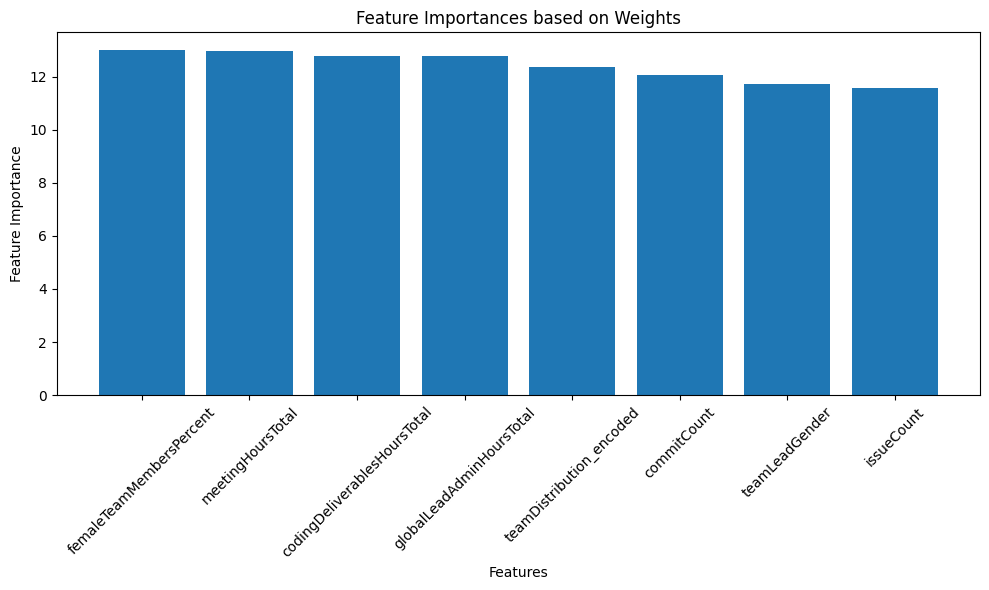

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights of the first layer
weights = model1.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Create a list of feature names
feature_names = ["femaleTeamMembersPercent", "meetingHoursTotal", "codingDeliverablesHoursTotal", "globalLeadAdminHoursTotal", "commitCount", "issueCount", "teamLeadGender","teamDistribution_encoded"]

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances based on Weights')
plt.tight_layout()
plt.show()




In [ ]:
# Select instances with positive (class 1) labels
positive_indices = np.where(y_test == 1)[0]
positive_instances = X_test[positive_indices]

# Select instances with negative (class 0) labels
negative_indices = np.where(y_test == 0)[0]
negative_instances = X_test[negative_indices]

# Select misclassified instances
y_pred = model1.predict(X_test)
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_instances = X_test[misclassified_indices]


1/1 [==============================] - 0s 242ms/step


In [ ]:
import lime
from lime import lime_tabular
import numpy as np

# Create an explainer object for LIME
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['0', '1'], discretize_continuous=True)

# Select an instance for interpretation (e.g., a positive instance)
instance_index = 0  # Choose the index of the instance you want to interpret
instance = positive_instances[instance_index]

# Generate an explanation for the instance using LIME
explanation = explainer.explain_instance(instance, model1.predict_proba, num_features=len(X_train.columns))

# Print the explanation
explanation.show_in_notebook()





AttributeError: 'Sequential' object has no attribute 'predict_proba'

[array([[-3.12057579e-02, -5.91858067e-01,  5.82409348e-03,
         9.05090695e-01, -3.01082843e-02, -1.00961745e-01,
         2.48503378e-03, -7.04434727e-06]])]
2/2 [==============================] - 0s 10ms/step


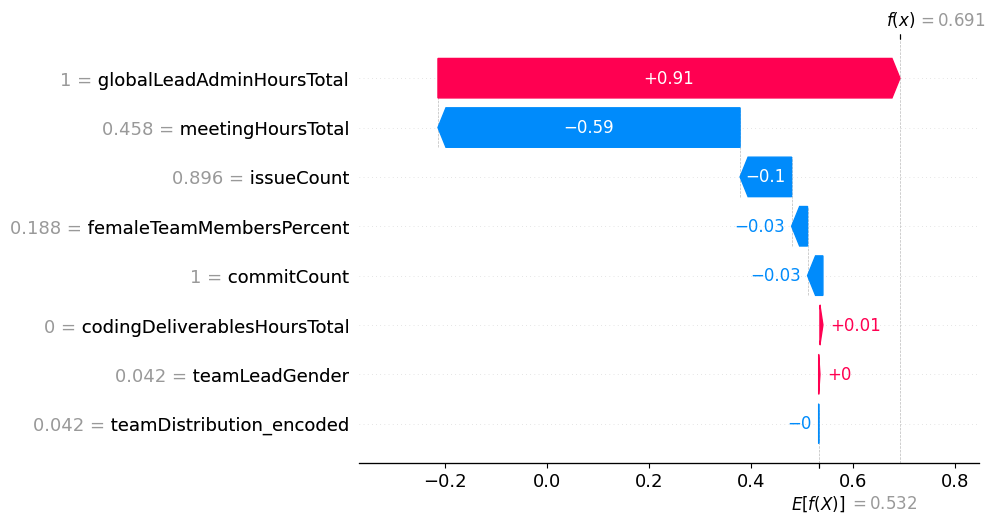

In [ ]:
import shap

# Reshape X_train to match the input dimensions of your model
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]))

# Create a DeepExplainer object
explainer = shap.DeepExplainer(model1, X_train_reshaped)

# Choose an instance to explain
instance = positive_instances[0]  # Select one of the positive instances

# Reshape the instance to match the input dimensions of your model
instance_reshaped = instance.reshape((1, instance.shape[0]))

# Explain the instance
shap_values = explainer.shap_values(instance_reshaped)

print(shap_values)  # Print the contents of shap_values to inspect its structure

explanation = shap.Explanation(values=shap_values[0], base_values=model1.predict(X_train_reshaped).mean(axis=0), data=X_train_reshaped, feature_names=feature_names)
shap.plots.waterfall(explanation[0])





1/1 [==============================] - 0s 32ms/step


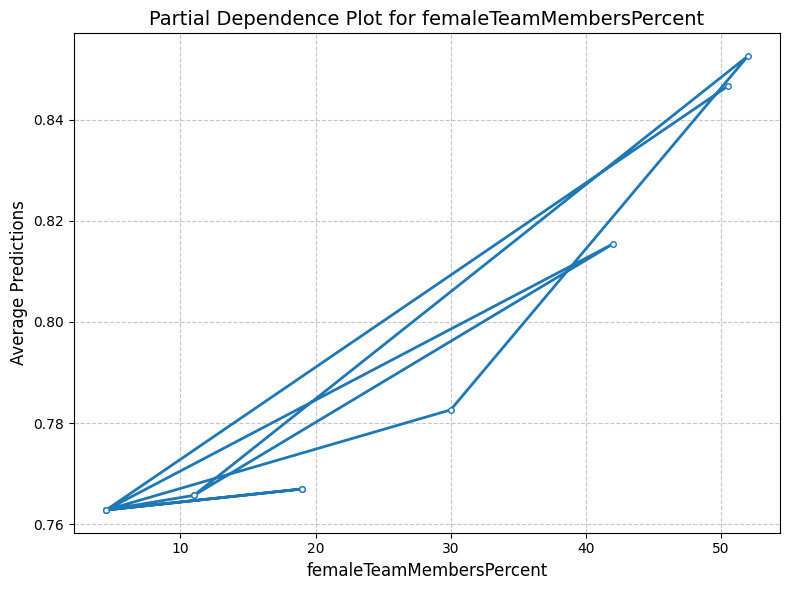

1/1 [==============================] - 0s 33ms/step


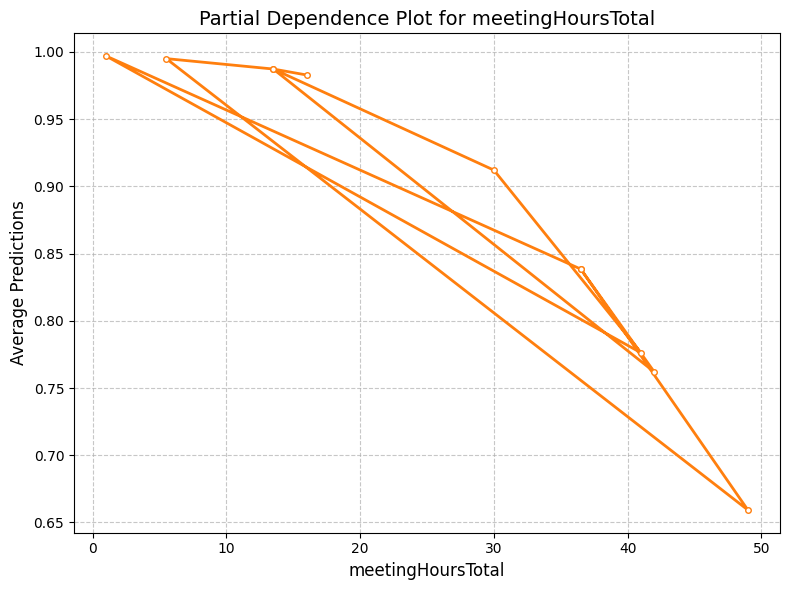

1/1 [==============================] - 0s 30ms/step


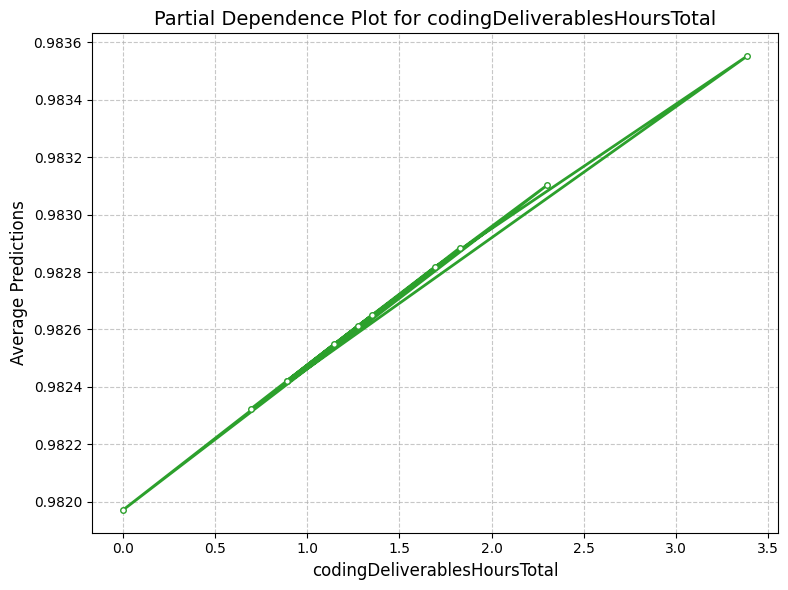

1/1 [==============================] - 0s 44ms/step


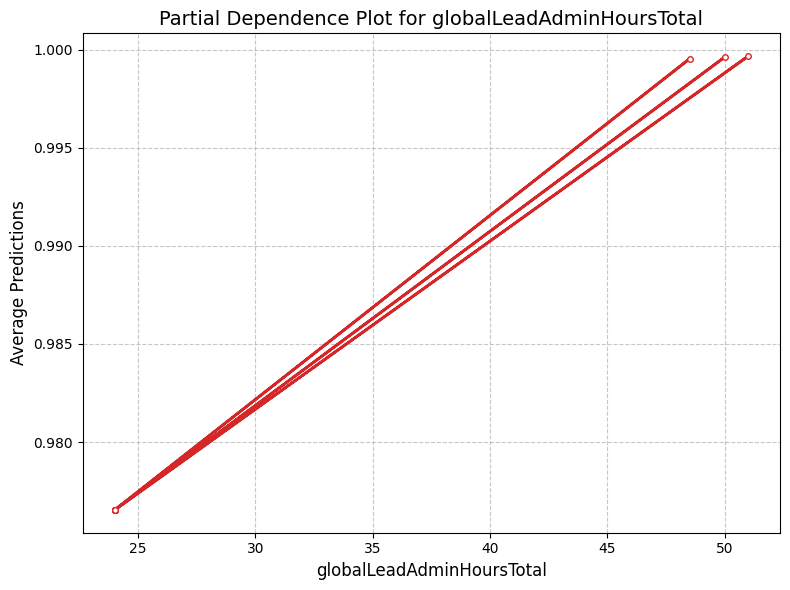

1/1 [==============================] - 0s 30ms/step


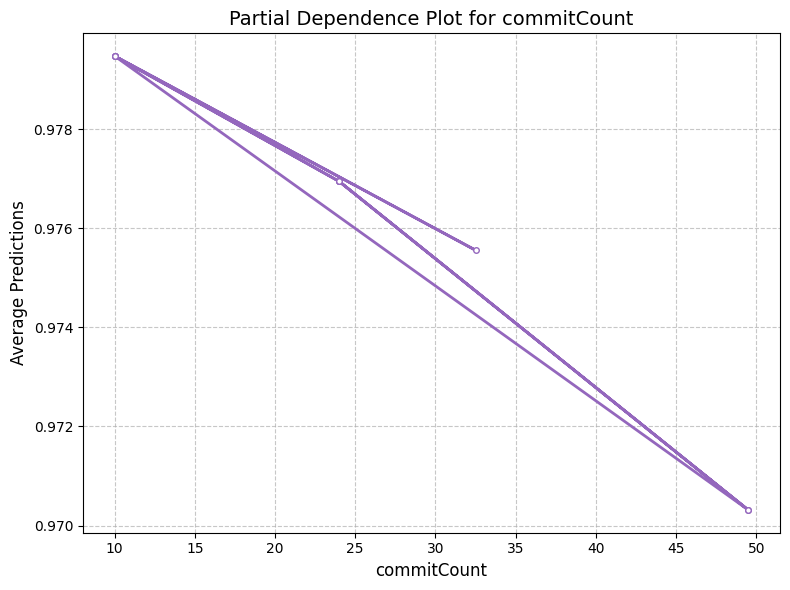

1/1 [==============================] - 0s 36ms/step


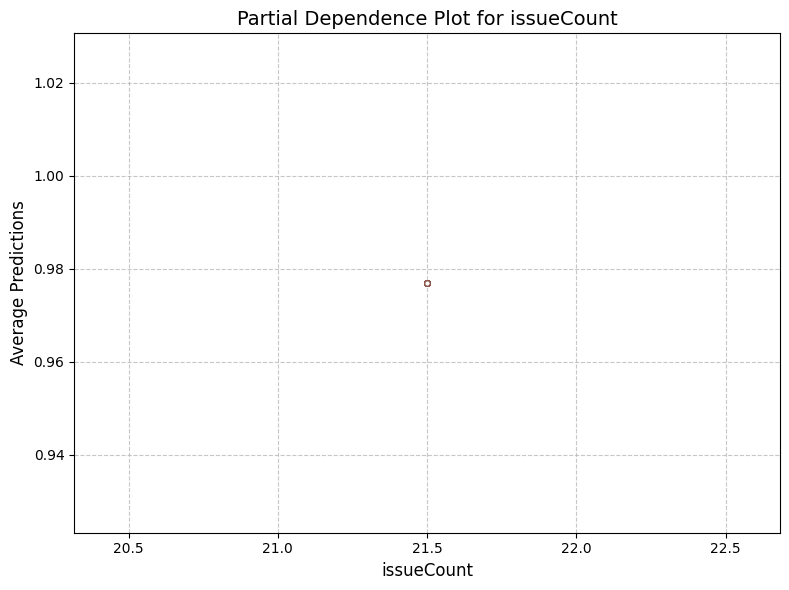

1/1 [==============================] - 0s 60ms/step


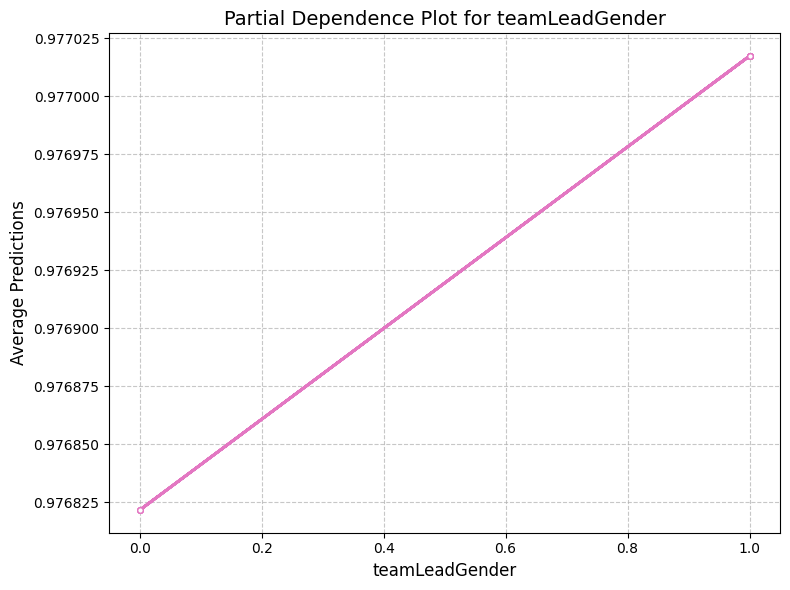

1/1 [==============================] - 0s 38ms/step


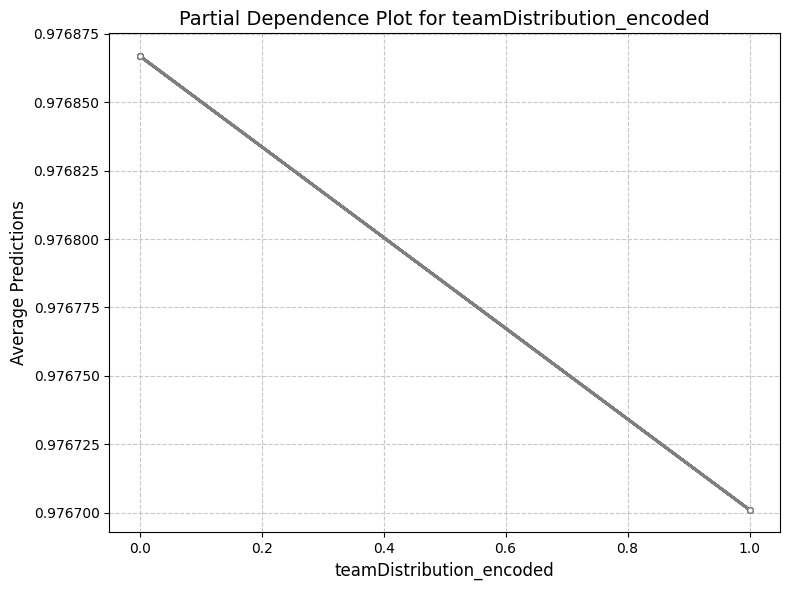

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predictions of your neural network model on the test data
y_pred = model1.predict(X_test)


# Set a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Select the features for which you want to create the partial dependence plot
feature_indices = [0, 1, 2, 3, 4, 5, 6, 7]  # Indices of the features in X_test
feature_names = ["femaleTeamMembersPercent", "meetingHoursTotal", "codingDeliverablesHoursTotal",
                 "globalLeadAdminHoursTotal", "commitCount", "issueCount", "teamLeadGender", "teamDistribution_encoded"]  # Names of the features

# Create a copy of the test data to modify the feature values
X_modified = X_test.copy()

# Plot each feature in a separate plot with improved aesthetics
for i in range(len(feature_indices)):
    feature_index = feature_indices[i]
    feature_values = X_test[:, feature_index]  # Extract the values of the selected feature

    # Calculate the average predictions while varying the feature of interest
    avg_predictions = []
    for value in feature_values:
        X_modified[:, feature_index] = value  # Set the feature value
        predictions = model1.predict(X_modified)  # Get the predictions
        avg_predictions.append(np.mean(predictions))  # Calculate the average prediction

    # Create a new plot for the feature with improved aesthetics
    plt.figure(figsize=(8, 6))
    plt.plot(feature_values, avg_predictions, color=colors[i], linewidth=2, marker='o', markersize=4, markerfacecolor='white')
    plt.xlabel(feature_names[i], fontsize=12)
    plt.ylabel('Average Predictions', fontsize=12)
    plt.title('Partial Dependence Plot for {}'.format(feature_names[i]), fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
X_test.shape

(11, 8)

In [ ]:
y_test.shape

(11,)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create individual models
model = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = model1

# Create the voting classifier
ensemble = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3), ('nn', model4)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.36363636363636365


In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC

# Make predictions on the test set
predicted_labels_rf = rf_classifier.predict(X_test)
predicted_labels_gb = gb_classifier.predict(X_test)
predicted_labels_svm = svm_classifier.predict(X_test)
predicted_labels_lr = logreg_classifier.predict(X_test)
predicted_labels_nn = model1.predict(X_test)


1/1 [==============================] - 0s 51ms/step


In [ ]:
# Calculate precision for each model
precision_rf = precision_score(y_test, predicted_labels_rf)
precision_gb = precision_score(y_test, predicted_labels_gb)
precision_svm = precision_score(y_test, predicted_labels_svm)
precision_lr = precision_score(y_test, predicted_labels_lr)
precision_nn = precision_score(y_test, predicted_labels_nn)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# Calculate recall for each model
recall_rf = recall_score(y_test, predicted_labels_rf)
recall_gb = recall_score(y_test, predicted_labels_gb)
recall_svm = recall_score(y_test, predicted_labels_svm)
recall_lr = recall_score(y_test, predicted_labels_lr)
recall_nn = recall_score(y_test, predicted_labels_nn)

In [ ]:
# Calculate predicted probabilities for each model
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)
probabilities_rf = rf_classifier.predict_proba(X_test)[:, 1]
probabilities_gb = gb_classifier.predict_proba(X_test)[:, 1]
probabilities_svm = svm_classifier.predict_proba(X_test)[:, 1]
probabilities_lr = logreg_classifier.predict_proba(X_test)[:, 1]
probabilities_ann = model1.predict(X_test)


1/1 [==============================] - 0s 38ms/step


In [ ]:
# Calculate AUC for each model
auc_rf = roc_auc_score(y_test, probabilities_rf)
auc_gb = roc_auc_score(y_test, probabilities_gb)
auc_svm = roc_auc_score(y_test, probabilities_svm)
auc_lr = roc_auc_score(y_test, probabilities_lr)
auc_nn = roc_auc_score(y_test, probabilities_ann)

In [ ]:

models = ['Random Forest', 'Gradient Boost', 'SVM', 'Logistic Regression', 'Neural Network']
precision_scores = [precision_rf, precision_gb, precision_svm, precision_lr, precision_nn]
recall_scores = [recall_rf, recall_gb, recall_svm, recall_lr, recall_nn]
auc_scores = [auc_rf, auc_gb, auc_svm, auc_lr, auc_nn]
accuracy_score = [rf_accuracy, gb_accuracy, svm_accuracy, lr_accuracy, ann_accuracy]

In [ ]:
# Print the performance scores
for i in range(len(models)):
    print(f"Performance scores for {models[i]}:")
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("AUC:", auc_scores[i])
    print("Accuracy", accuracy_score[i])
    print()

Performance scores for Random Forest:
Precision: 0.6666666666666666
Recall: 1.0
AUC: 0.6904761904761905
Accuracy 0.7692307692307693

Performance scores for Gradient Boost:
Precision: 0.5555555555555556
Recall: 0.8333333333333334
AUC: 0.5714285714285714
Accuracy 0.6153846153846154

Performance scores for SVM:
Precision: 0.6666666666666666
Recall: 0.6666666666666666
AUC: 0.5
Accuracy 0.6923076923076923

Performance scores for Logistic Regression:
Precision: 0.75
Recall: 1.0
AUC: 0.9047619047619048
Accuracy 0.8461538461538461

Performance scores for Neural Network:
Precision: 0.46153846153846156
Recall: 1.0
AUC: 0.5
Accuracy 0.46153846153846156



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Perform cross-validation
scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)

# Compute mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.30769231 0.84615385 0.38461538 0.61538462 0.66666667]
Mean Accuracy: 0.5641025641025641
